In [2]:
!pip install xgboost

In [232]:
!pip install -U imbalanced-learn

In [1]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler

In [2]:
data = pd.read_csv('dataset_v10.csv')

In [3]:
data

,status,num_funding_rounds,total_funding_usd,facebook_url,linkedin_url,twitter_url,short_description,CAN,CHN,DEU,...,categ_1_hot_Video,have_seed,have_series_a,have_series_b,have_series_c,have_angel,num_founder,is_mba,average_edu_level,average_ins_level
0,1,17.0,1.612282e+10,1,1,1,1,0,0,0,...,1,0,1,1,1,1,7.0,0.00,0.36,1.71
1,0,1.0,8.000000e+05,1,0,1,1,0,0,0,...,0,0,0,0,0,1,2.0,0.00,0.00,0.00
2,0,4.0,1.850000e+07,1,1,1,1,0,0,0,...,0,1,1,1,0,1,4.0,0.00,0.50,0.00
3,0,2.0,4.700000e+06,1,1,1,1,0,0,0,...,0,1,1,0,0,0,2.0,0.00,0.00,0.00
4,1,5.0,1.469997e+07,1,1,1,1,0,0,0,...,1,0,1,0,0,1,6.0,0.17,0.33,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10899,0,1.0,6.109300e+04,1,0,0,1,0,0,0,...,0,1,0,0,0,0,2.0,0.00,0.00,0.00
10900,0,1.0,7.500000e+04,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1.0,0.00,0.00,0.00
10901,0,1.0,1.000000e+05,1,1,0,1,0,0,0,...,0,1,0,0,0,0,1.0,0.00,0.00,0.00
10902,0,1.0,3.513700e+05,1,1,1,1,0,0,0,...,0,1,0,0,0,0,2.0,0.00,0.00,0.00


In [4]:
data['status'].value_counts()


0    7758
1    3146
Name: status, dtype: int64

In [5]:
# data_neg = data.loc[data['status']==0]
# data_pos = data.loc[data['status']==1]
# data_pos2 = data_pos.sample(n=data_neg.shape[0]*1,random_state=1)

# data = shuffle(pd.concat([data_neg, data_pos2]))

# # Y_test = X_test['status']
# # X_test = X_test.drop(columns=['status'])


In [6]:
# data = pd.read_csv('dataset_v2.csv')

ros = RandomOverSampler(random_state=0)
Y_data = data['status']
X_data = data.drop(columns=['status'])
X_resampled, y_resampled = ros.fit_resample(X_data, Y_data)
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size = 0.3)
X_resampled

,num_funding_rounds,total_funding_usd,facebook_url,linkedin_url,twitter_url,short_description,CAN,CHN,DEU,ESP,...,categ_1_hot_Video,have_seed,have_series_a,have_series_b,have_series_c,have_angel,num_founder,is_mba,average_edu_level,average_ins_level
0,17.0,1.612282e+10,1,1,1,1,0,0,0,0,...,1,0,1,1,1,1,7.0,0.00,0.36,1.71
1,1.0,8.000000e+05,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,2.0,0.00,0.00,0.00
2,4.0,1.850000e+07,1,1,1,1,0,0,0,0,...,0,1,1,1,0,1,4.0,0.00,0.50,0.00
3,2.0,4.700000e+06,1,1,1,1,0,0,0,0,...,0,1,1,0,0,0,2.0,0.00,0.00,0.00
4,5.0,1.469997e+07,1,1,1,1,0,0,0,0,...,1,0,1,0,0,1,6.0,0.17,0.33,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15511,9.0,1.780309e+07,0,1,1,1,0,0,1,0,...,0,1,1,1,0,0,2.0,0.00,0.00,0.00
15512,2.0,2.249999e+06,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,2.0,0.00,1.50,1.50
15513,2.0,1.207713e+06,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,2.0,0.00,0.00,0.00
15514,1.0,5.000000e+05,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,3.0,0.00,0.00,0.00


In [7]:
print(y_test.value_counts())
print(y_train.value_counts())

0    2335
1    2320
Name: status, dtype: int64
1    5438
0    5423
Name: status, dtype: int64


In [8]:
model = XGBClassifier()
model.fit(X_train, y_train)

C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = XGBClassifier()
kfold = KFold(n_splits=5, random_state=7,shuffle=True)
results = cross_val_score(model, X_train, y_train, cv=kfold)
model.fit(X_train, y_train)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:13:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:13:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:13:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Administrator\anaconda3\envs\mlp\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 84.15% (0.57%)


In [53]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.13%


In [15]:
from sklearn.metrics import confusion_matrix

In [28]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

0.8513023333087204

In [35]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.8212674543501611

In [27]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
fpr
tpr

metrics.auc(fpr, tpr)

0.8513023333087203

In [54]:
c = confusion_matrix(y_test, y_pred)
c

array([[2017,  318],
       [ 374, 1946]], dtype=int64)

In [55]:
# import numpy as np

# c = np.array([[1946, 374],
#      [318, 2017]])

In [56]:
def metrics(c):
    tp = c[1, 1]
    tn = c[0, 0]
    fp = c[0, 1]
    fn = c[1, 0]
    prec = tp / (tp + fp) if(tp + fp > 0) else 0
    recl = tp / (tp + fn) if(tp + fn > 0) else 0
    f1 = 2 * tp/ (2 * tp + fp + fn) 
    return prec, recl, f1

In [57]:
metrics(c)

(0.8595406360424028, 0.8387931034482758, 0.8490401396160558)

In [291]:
metrics(c)

(0.7989918084436043, 0.8055908513341804, 0.8022777602024675)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


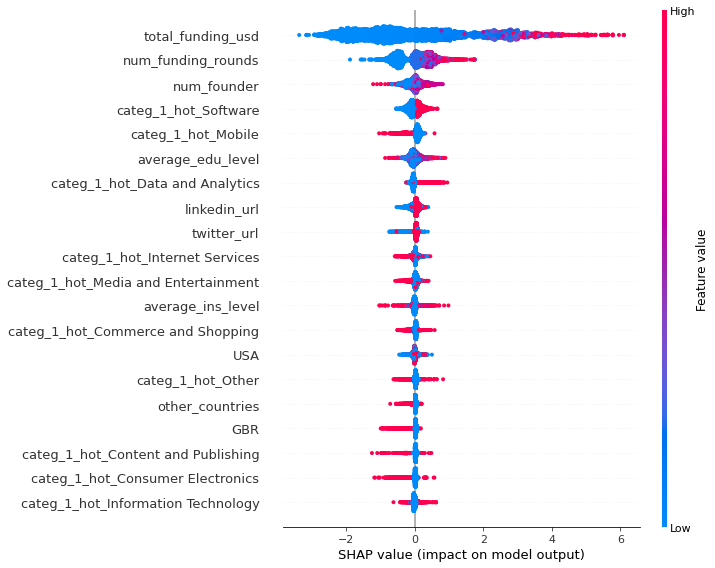

In [41]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

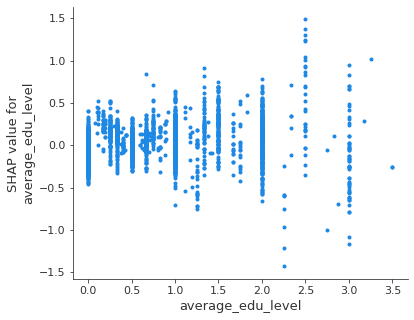

In [15]:
shap.dependence_plot('average_edu_level', shap_values, X_test, interaction_index=None, show=False)

In [16]:
import numpy as np
import copy

In [17]:
X_test_ = copy.deepcopy(X_test)
X_test_['total_funding_usd'] = np.log(X_test_['total_funding_usd'])

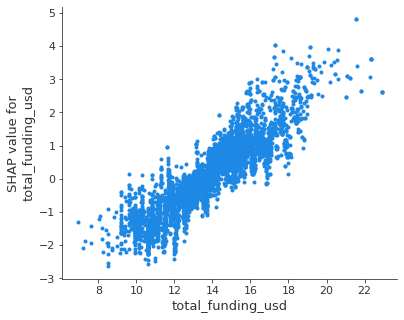

In [18]:
shap.dependence_plot('total_funding_usd', shap_values, X_test_, interaction_index=None, show=False)

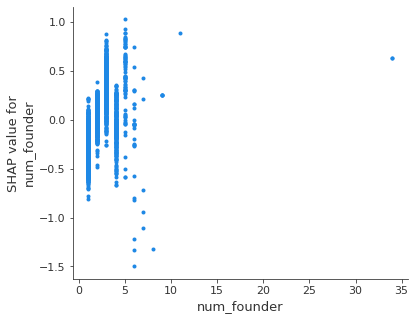

In [19]:
shap.dependence_plot('num_founder', shap_values, X_test, interaction_index=None, show=False)

In [20]:
np.percentile(X_test['num_funding_rounds'], [50, 75, 95, 100])

array([ 2.,  3.,  6., 24.])

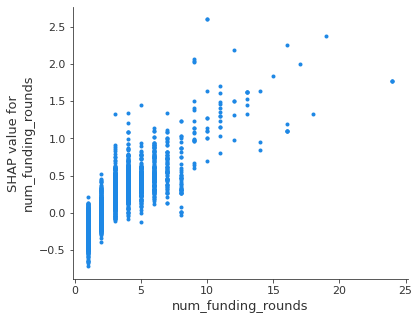

In [21]:
shap.dependence_plot('num_funding_rounds', shap_values, X_test, interaction_index=None, show=False)

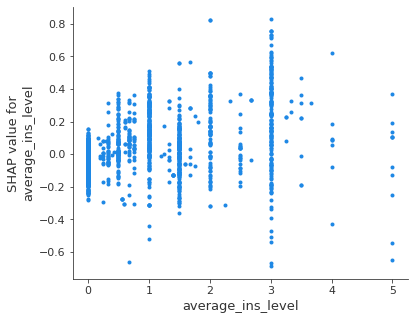

In [22]:
shap.dependence_plot('average_ins_level', shap_values, X_test, interaction_index=None, show=False)

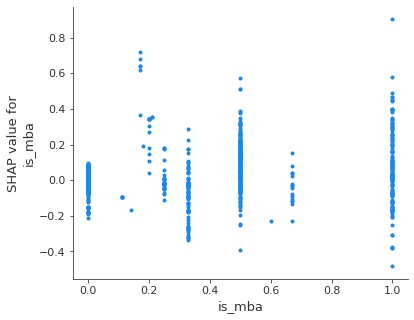

In [23]:
shap.dependence_plot('is_mba', shap_values, X_test, interaction_index=None, show=False)

Text(0.5, 0, 'Xgboost Feature Importance')

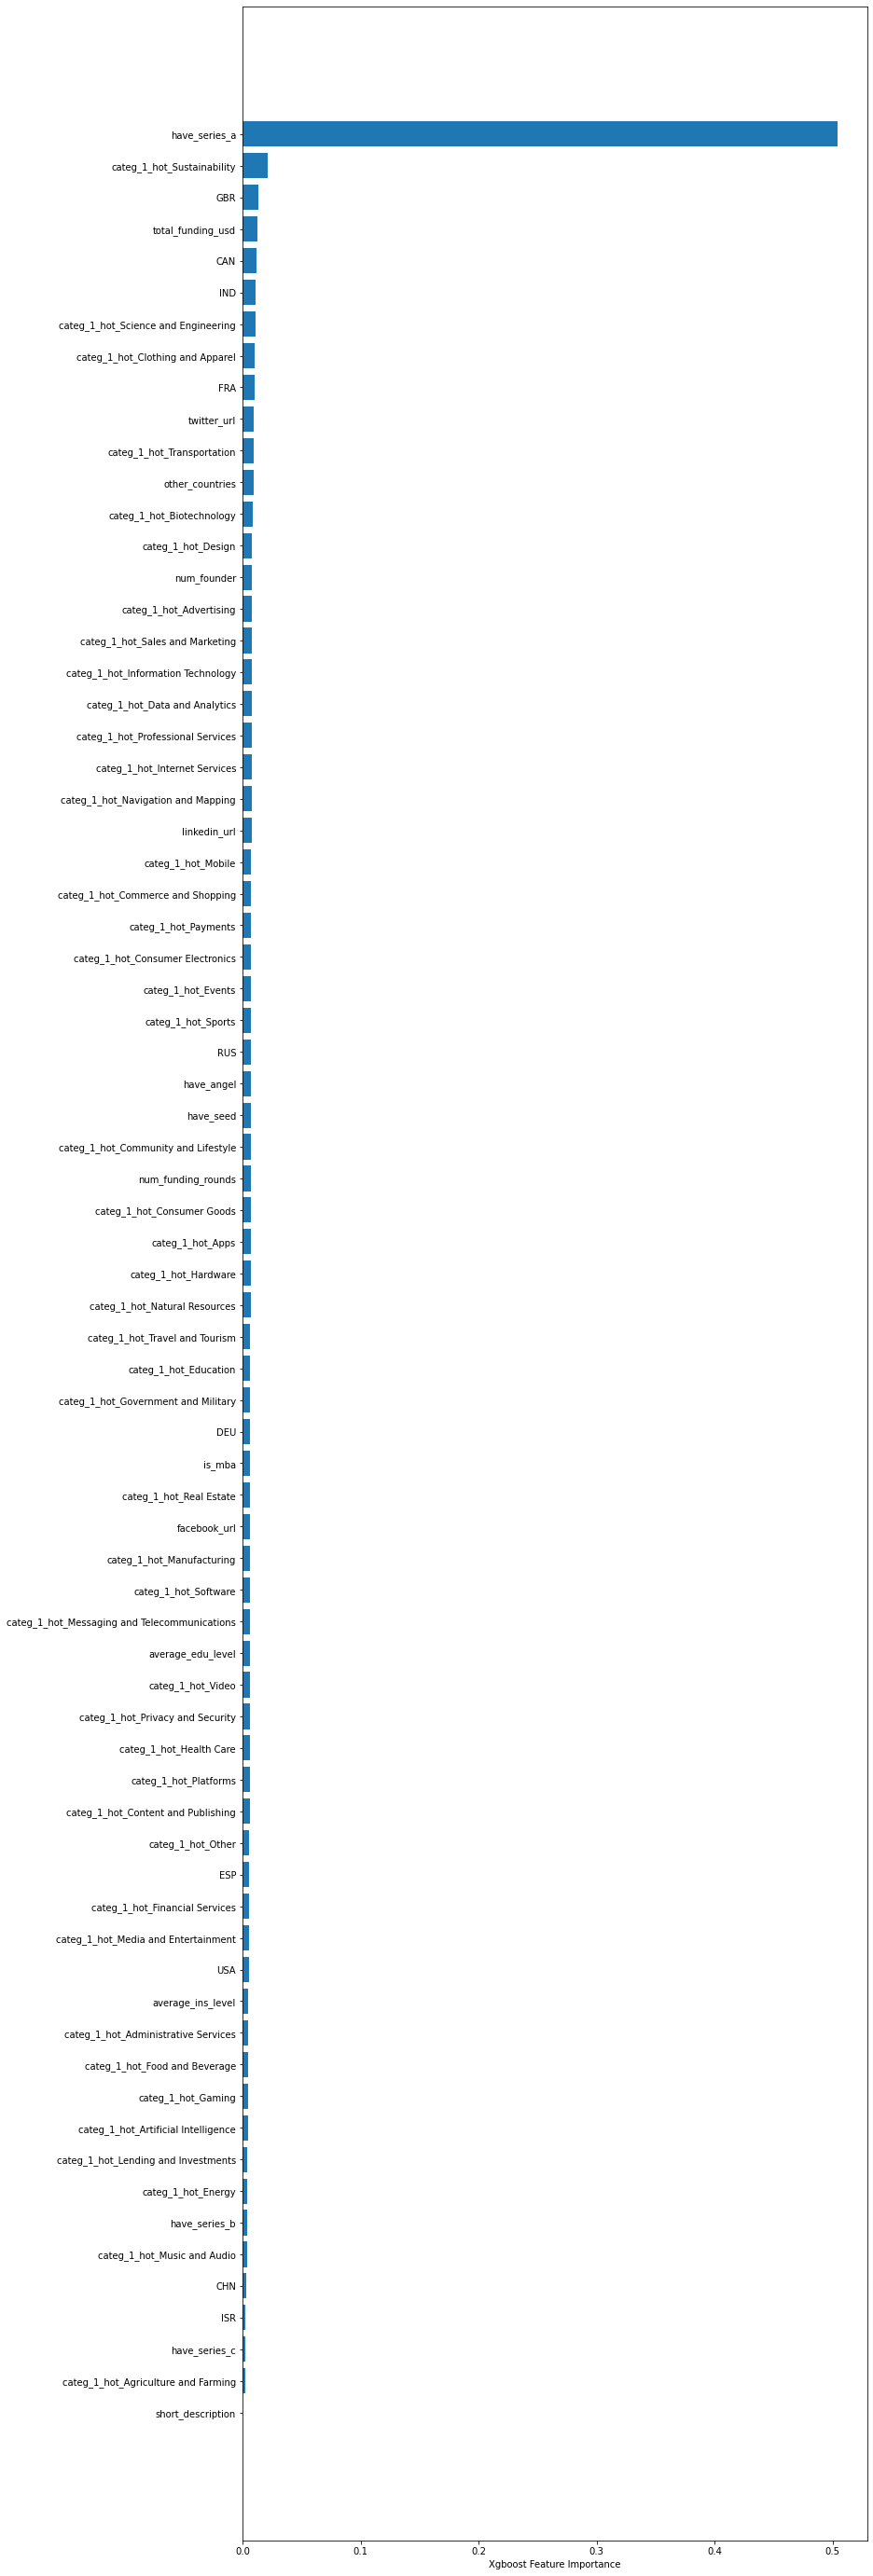

In [24]:
import matplotlib.pyplot as plt
x_names = X_train.columns.values.tolist()
sorted_idx = model.feature_importances_.argsort()
# print( X_train.columns.values[sorted_idx])
fig,ax1 = plt.subplots(figsize=(12,50))
plt.barh( X_train.columns.values[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")